In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, sample, randint
#%matplotlib inline

In [15]:
def GraficaPoblacion(P,gen = False,function = None):
    #Gráficas de curvas de nivel

    X = np.linspace(-5,5,100)
    Y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(X, Y)
    Z = getFunction(X,Y,function)
    
    plt.clf()
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    plt.clabel(ax, inline=1, fontsize=10)
    plt.title('Poblacion')


def getFunction(X,Y,function = None):
    if function == 1 : #Funcion de De Jong
        Z = X**2 + Y**2

    elif function == 2: #Funcion: Rosenbrock's Valley
        Z = 100*(Y-X**2)**2 + (1-X)**2 
        
    elif function == 3: #Funcion de Rastrigin
        Z = 20+X**2+Y**2-10*np.cos(2*np.pi*X)-10*np.cos(2*np.pi*Y)
        
    elif function == 4: #Funcion de Schwefel
        Z=-X*np.sin(np.sqrt(np.abs(X)-Y*np.sin(np.sqrt(np.abs(Y))))) 
    elif function == 5:
        Z= ((X**2 + Y**2)/4000) - np.cos(X)*np.cos(Y/np.sqrt(2)) + 1
    elif function == 6:
        Z=-X*np.sin(np.sqrt(np.abs(X))-Y*np.sin(np.sqrt(np.abs(Y)))) 
    
    return Z
    
def GraficaPoblaciones(Ps,function,gen = False):
    #Gráficas de curvas de nivel
    plt.clf()
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(-10,10,100)
    Y = np.linspace(-10,10,100)
    X, Y = np.meshgrid(X, Y)
    Z = getFunction(X,Y,function)
    plt.clf()
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    plt.clabel(ax, inline=1, fontsize=10)
    plt.title('Poblacion')

    #grafica la población
    cols = ['r','b','g','k']
    for i,P in enumerate(Ps):
        if gen:
            for I in P:
                [x1,x2] = I[0],I[1]
                ax.scatter3D(x1,x2,s=30,c=cols[i%4])    
        else:
            for I in P:
                [x1,x2] = Ind2Number(I,v_min,v_max,n_var,n_bits)
                ax.scatter3D(x1,x2,s=30,c=cols[i%4])    
    plt.show()

In [4]:
def IniciaPob(N,n_var,n_bits):
    Pob = []
    for i in range(N):
        I = ''
        for v in range(n_var):
            for b in range(n_bits):
                I = I+sample(['0','1'],1)[0]
        Pob.append(I)
    return Pob

In [5]:
def Ind2Number(I, v_min, v_max, n_vars, n_bits):        
    numb = []
    for i in range(n_vars):
        cod_v = I[i*n_bits:(i+1)*n_bits]
        d_i = int(cod_v,2)
        val = v_min[i]+d_i*(v_max[i]-v_min[i])/float(2**n_bits-1)
        numb.append(val)
    return numb        

In [6]:
def Convert_Poblation(P0,v_min,v_max,n_vars,n_bits):
    pop = []
    for item in P0:
        pop.append(Ind2Number(item,v_min,v_max,n_vars,n_bits))
    return pop
    

In [7]:
N = 10
n_bits = 4
n_var = 2
v_min = [-5,-5]
v_max = [5,5] 

P0 = IniciaPob(N,n_var,n_bits)
P0_Gen = Convert_Poblation(P0,v_min,v_max,n_var,n_bits)
P0_Gen

[[0.33333333333333304, 5.0],
 [1.666666666666667, 0.33333333333333304],
 [-5.0, -3.666666666666667],
 [2.333333333333333, -4.333333333333333],
 [1.0, 5.0],
 [1.666666666666667, 3.0],
 [-3.666666666666667, -4.333333333333333],
 [-2.3333333333333335, 3.0],
 [-4.333333333333333, -3.0],
 [-3.0, -4.333333333333333]]

In [21]:
def Aptitude(I,f,gen = False):
    if gen:
        [x1,x2] = I[0],I[1]
    else:
        [x1,x2] = Ind2Number(I,v_min,v_max,n_var,n_bits)
        
    r = getFunction(x1,x2,f)
    return 1.0/(1.0+0.1*r)

In [9]:
def Evo(parents,child_size,ro):
    childs = []
    for i in range(child_size):
        p = np.array(sample(parents,ro))
        childs.append([np.sum(p[:,0])/len(p),np.sum(p[:,1])/len(p)])
    return childs

Gen_Childs = Evo(P0_Gen,len(P0_Gen)+20,5)
Gen_Childs

[[-2.8666666666666667, -0.6],
 [-0.6, 1.6666666666666665],
 [-2.6, -1.5333333333333334],
 [-0.7333333333333334, -0.7333333333333332],
 [0.33333333333333337, 0.2],
 [-1.8, 0.06666666666666661],
 [-1.2666666666666666, -1.2666666666666664],
 [-0.7333333333333332, 0.2],
 [-1.5333333333333334, -2.733333333333333],
 [-2.3333333333333335, -1.6666666666666665],
 [-1.6666666666666665, 0.06666666666666661],
 [-0.6, -0.8666666666666666],
 [-0.8666666666666666, -0.6],
 [-1.6666666666666665, -3.0],
 [-0.7333333333333334, -0.8666666666666666],
 [-0.1999999999999999, 1.4],
 [-1.6666666666666667, 1.1333333333333333],
 [-1.933333333333333, 0.3333333333333332],
 [-1.6666666666666665, -1.2666666666666664],
 [-0.33333333333333337, -1.5333333333333337],
 [-0.4666666666666666, 1.4],
 [-3.0000000000000004, -0.6],
 [-2.6, -0.7333333333333332],
 [0.06666666666666661, 0.9999999999999998],
 [-0.3333333333333333, 1.4],
 [-2.4666666666666672, -1.8],
 [-0.8666666666666666, 0.06666666666666661],
 [-0.466666666666666

In [10]:
def Mutacion(P,sd):
    mutatedChilds = []
    for i in P:
        mutatedChilds.append([i[0]+np.random.normal(loc = 0,scale=sd),i[1]+np.random.normal(loc = 0,scale=sd)])
    return mutatedChilds

Gen_Childs = Mutacion(Gen_Childs,.5)
Gen_Childs

[[-3.608883894337168, -1.6153842415830622],
 [-0.6373248507717412, 2.240694901168678],
 [-2.4905195545160903, -1.312016608100293],
 [-0.5044313446135507, -0.6684233412593976],
 [0.08972981785329126, -0.28857741653013036],
 [-1.429832919415609, 0.03348517294355439],
 [-2.510551548387544, -1.063852029090217],
 [-1.2673690944179907, -0.1753736301995017],
 [-1.9189937997656437, -2.7512983843337313],
 [-2.79607596667532, -2.2428403652490476],
 [-1.7146499043630512, 0.18312860273325476],
 [-0.5710717018382522, -1.606512916634957],
 [0.0031449793733250297, -0.5289927232214839],
 [-1.482134035253164, -2.8366901564878573],
 [-0.04836617515675257, -2.4651664656355132],
 [-1.6153566908158477, 1.6053237527008761],
 [-1.080051219659452, 1.657599732190718],
 [-1.3355358718890629, 0.7953591910681359],
 [-1.7157212192796985, -1.4502991909926803],
 [-0.9463771542563314, -1.8597161098922963],
 [-1.4221657061485236, 0.6737656987574376],
 [-3.0511928842385823, -1.05184117611007],
 [-2.0290514367229795, -1

<Figure size 432x288 with 0 Axes>

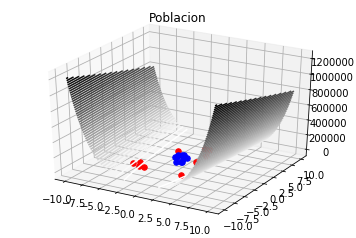

In [24]:
def Seleccion(P,N,function):
    selected = []
    aptitudes = []
    newGen = []
    
    for i in P:
        aptitudes.append(np.array([i[0],i[1],Aptitude(i,function,True)]))
    aptitudes = sorted(aptitudes,key= lambda x: x[2],reverse=True)
    
    for new in aptitudes[:10]:
        newGen.append([new[0],new[1]])
    
    return newGen

newGen = Seleccion(Gen_Childs,N,2)

GraficaPoblaciones([P0_Gen,newGen],2,True)

<Figure size 432x288 with 0 Axes>

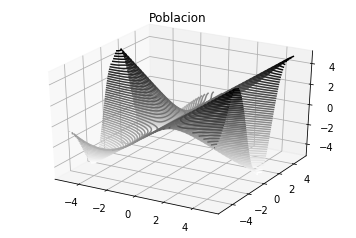

In [83]:
GraficaPoblacion(P0,function = 6)